## Prep mme

In [52]:
import pandas as pd

df_total = pd.read_csv('subset.csv')

In [53]:
df_total.shape

(4000000, 41)

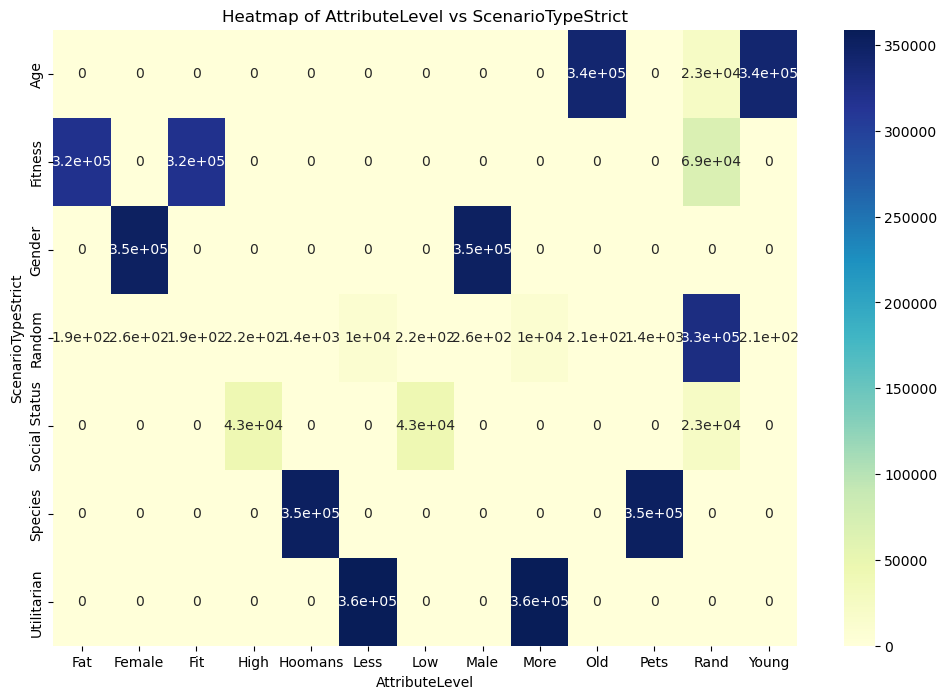

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df_total['ScenarioTypeStrict'], df_total['AttributeLevel'])

plt.figure(figsize=(12,8))

# Plot a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of AttributeLevel vs ScenarioTypeStrict')
plt.xlabel('AttributeLevel')
plt.ylabel('ScenarioTypeStrict')
plt.show()

In [55]:
df_total['AttributeLevel'].value_counts()

AttributeLevel
Rand       442488
More       369398
Less       369398
Pets       354170
Hoomans    354170
Male       351791
Female     351791
Young      341224
Old        341224
Fit        318965
Fat        318965
Low         43208
High        43208
Name: count, dtype: int64

In [56]:
# deleting rows with 'Low' and 'High' values in the 'AttributeLevel' column, as they are underrepresented in the human dataset compared to the LLM's
# deleting rows with 'Rand' in the 'AttributeLevel' column, as they don't occur in the llm dataset

df_total.drop(df_total[df_total['AttributeLevel'].isin(['Low', 'High', 'Rand'])].index, inplace=True)

In [57]:
df_total.shape

# should be 4000000-43208-43208-442488 = 3471096

(3471096, 41)

In [58]:
df_total['ScenarioTypeStrict'].value_counts()

ScenarioTypeStrict
Utilitarian    717820
Species        705608
Gender         703064
Age            682020
Fitness        637548
Random          25036
Name: count, dtype: int64

In [59]:
# deleting rows with 'Social Status' in the 'ScenarioTypeStrict' column, as they are underrepresented in the human dataset compared to the LLM's
# deleting rows with 'Random' in the 'ScenarioTypeStrict' column, as they don't occur in the llm dataset

# social status is already deleted cause it is completely correlated with Low, High and Rand of AttributeLevel
# so by deleting these, all instances of Social Status are deleted as well

df_total.drop(df_total[df_total['ScenarioTypeStrict'].isin(['Random'])].index, inplace=True)

In [60]:
df_total.shape

# should be 3471096 - 25036 = 3446060

(3446060, 41)

In [61]:
df_total.isna().sum()

ResponseID                      0
ExtendedSessionID               0
UserID                        400
ScenarioOrder                   0
Intervention                    0
PedPed                          0
Barrier                         0
CrossingSignal                  0
AttributeLevel                  0
ScenarioTypeStrict              0
ScenarioType                    0
DefaultChoice                   0
NonDefaultChoice                0
DefaultChoiceIsOmission         0
NumberOfCharacters              0
DiffNumberOFCharacters          0
Saved                           0
Template                   450410
DescriptionShown           450410
LeftHand                   450410
UserCountry3                32482
Man                             0
Woman                           0
Pregnant                        0
Stroller                        0
OldMan                          0
OldWoman                        0
Boy                             0
Girl                            0
Homeless      

In [62]:
# deleting rows with NaN's in the UserID column

df_total = df_total.dropna(subset=['UserID'])

In [63]:
df_total.shape

(3445660, 41)

In [64]:
# the total dataset has to be 2.5M rows.
# 50% of that is LLM's, so 1.250.000 rows
# the other 50% will be humans, so 1.250.000 rows

# need to subset 1.25M rows from the 3445660 rows
# need to delete 3445660 - 1250000 = 2195660 rows

In [65]:
# randomly delete 2195660 / 2 = 1097830 unique ResponseID's (is 2195660 rows), to ensure 2% of the dataset is LLMs and 98% humans

# Getting unique UserIDs
Response_unique = df_total['ResponseID'].unique()
print(len(Response_unique))  # should be 1722830

# Selecting 640075 UserIDs from the unique set
Response_delete = pd.Series(Response_unique).sample(n=1097830, random_state=42)


1722830


In [66]:
df_total_50 = df_total[~df_total['ResponseID'].isin(Response_delete)]

In [67]:
# checking shape of df_filtered

df_total_50.shape   # should be 4900000

(1250000, 41)

In [68]:
df_total_50.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
4,222JBu4KkKjnFQC9P,988708286_2649771417.0,2.649771e+09,12,0,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,222jc8QEnpn7JY5xh,-1776519460_4307308900611943.0,4.307309e+15,13,0,0,0,0,Fat,Fitness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,222q66Fw449NYCrWh,540993158_662683872362392.0,6.626839e+14,9,0,0,1,0,Pets,Species,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
18,223jpDQuo6SonrpnL,-1184547181_111740542591274.0,1.117405e+14,2,0,1,0,0,Female,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,223oXz2tcN4uSD58G,541612673_1246712807620280.0,1.246713e+15,2,0,0,0,2,More,Utilitarian,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# check what the distribution of RepsonseID's is (kinda)
# check if the indices of a responseID here are the same after transforming the ResponseID column
# if the indices are the same means ResponseID column is succesfully transformed

indices = df_total_50[df_total_50["ResponseID"] == '222JBu4KkKjnFQC9P'].index
print(indices)

Index([4, 504820], dtype='int64')


In [70]:
# Changing the responseID

# Define the starting point for the new ResponseID
starting_id = 773566

# Step 1: Get the unique ResponseIDs
unique_response_ids = df_total_50['ResponseID'].unique()

# Step 2: Create a mapping from old ResponseID to new 'res_' formatted ID
response_id_mapping = {old_id: f'res_{i:08d}' for i, old_id in enumerate(unique_response_ids, starting_id)}

# Step 3: Replace the original ResponseID with the new mapped IDs
df_total_50['ResponseID'] = df_total_50['ResponseID'].map(response_id_mapping)

C:\Users\esmku\AppData\Local\Temp\ipykernel_2936\3922283319.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_50['ResponseID'] = df_total_50['ResponseID'].map(response_id_mapping)


In [71]:
# ResponseID starts with res_00146784
df_total_50.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
4,res_00773566,988708286_2649771417.0,2.649771e+09,12,0,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,res_00773567,-1776519460_4307308900611943.0,4.307309e+15,13,0,0,0,0,Fat,Fitness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,res_00773568,540993158_662683872362392.0,6.626839e+14,9,0,0,1,0,Pets,Species,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
18,res_00773569,-1184547181_111740542591274.0,1.117405e+14,2,0,1,0,0,Female,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,res_00773570,541612673_1246712807620280.0,1.246713e+15,2,0,0,0,2,More,Utilitarian,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
indices = df_total_50[df_total_50["ResponseID"] == 'res_00627163'].index
print(indices)

# checking if the indices are the same after transforming the ResponseID column
# compared to the indices of the ResponseID before transforming the column - they are!
# both are [2, 504820]

Index([], dtype='int64')


In [73]:
df_total_50.tail()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
3999977,res_01398561,-13132535_562843045,5.628430e+08,1,1,0,1,0,Pets,Species,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3999978,res_01398562,1591577424_5650557499136071.0,5.650557e+15,13,1,1,0,0,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999987,res_01398563,-1688347996_99316659323500.0,9.931666e+13,6,1,0,0,1,Female,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999993,res_01398564,-1252544665_7351695836887306.0,7.351696e+15,6,1,1,0,1,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3999996,res_01398565,1617866231_4402803830519695.0,4.402804e+15,3,1,0,1,0,Less,Utilitarian,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0


In [74]:
# resetting index

df_total_50.reset_index(drop=True, inplace=True)

In [75]:
df_total_50.columns

Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand', 'UserCountry3', 'Man', 'Woman', 'Pregnant', 'Stroller',
       'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman',
       'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
       'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog',
       'Cat'],
      dtype='object')

In [76]:
# already deleting some columns to ensure it fits in memory
# deleting the columns that are not necessary for the modelling: ExtendedSessionID, DefaultChoice, NonDefaultChoice, DefaultChoiceIsOmission, Template

df_total_clean_del = df_total_50.drop(columns=['ExtendedSessionID', 'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'Template', 'ScenarioType', 'ScenarioOrder', 'DescriptionShown', 'LeftHand', 'UserCountry3'], axis=1)

In [77]:
df_total_clean_del.shape # should be 4900000 rows and 31 columns

(1250000, 31)

In [78]:
# binarizing UserID - making all into 0
df_total_clean_del['UserID'] = 0

## Prep llm

In [79]:
import pandas as pd
df_llm = pd.read_csv('llm_125_dataset.csv')

In [80]:
df_llm.shape

(1547132, 31)

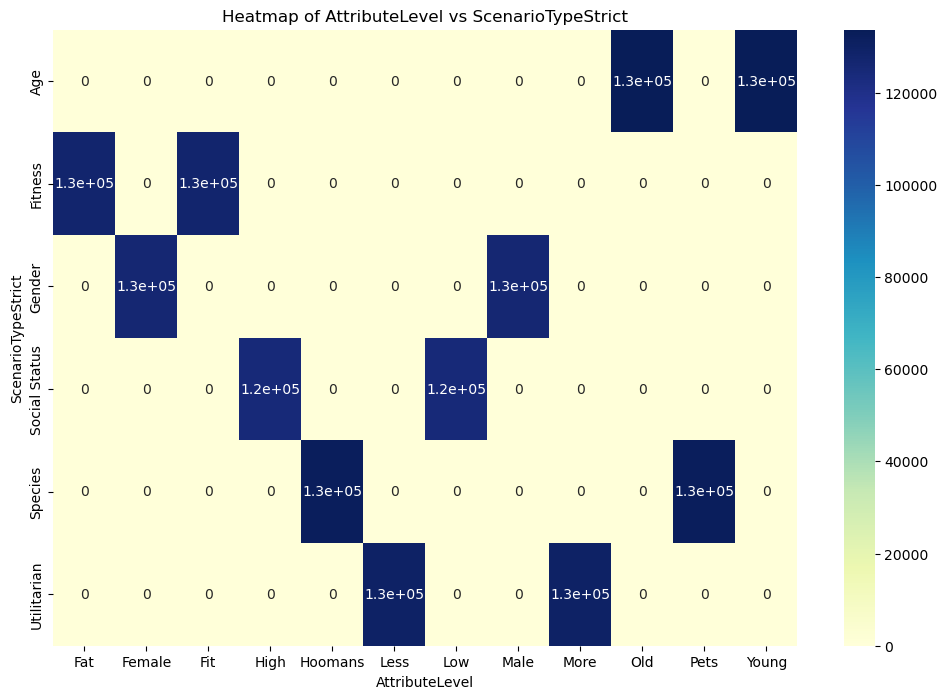

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df_llm['ScenarioTypeStrict'], df_llm['AttributeLevel'])

plt.figure(figsize=(12,8))

# Plot a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of AttributeLevel vs ScenarioTypeStrict')
plt.xlabel('AttributeLevel')
plt.ylabel('ScenarioTypeStrict')
plt.show()

In [82]:
df_llm.ScenarioTypeStrict.value_counts()

ScenarioTypeStrict
Age              267320
Species          264538
Utilitarian      259416
Fitness          255100
Gender           252220
Social Status    248538
Name: count, dtype: int64

In [83]:
df_llm.drop(df_llm[df_llm['ScenarioTypeStrict'].isin(['Social Status'])].index, inplace=True)

In [84]:
df_llm.shape

(1298594, 31)

In [85]:
df_llm['AttributeLevel'].value_counts()

AttributeLevel
Young      133660
Old        133660
Hoomans    132269
Pets       132269
Less       129708
More       129708
Fat        127550
Fit        127550
Male       126110
Female     126110
Name: count, dtype: int64

In [86]:
# no need to delete any rows in the 'AttributeLevel' column, as High and low are both already deleted cause you delete the Social Status rows

In [87]:
# df_llm.to_csv('llm_deleted_dataset.csv', index=False)

In [88]:
# randomly keeping 1.25M of the dataset
# 1.25M rows = 1.250.000 / 2 = 625000 unique responseID's

In [89]:
# randomly keep 625000 unique responseID's LLM dataset

# Getting unique UserIDs
Response_unique = df_llm['ResponseID'].unique()
print(len(Response_unique))  # should be 1298594/2 = 649297

# Selecting 719242 UserIDs from the unique set
Response_keep_llm = pd.Series(Response_unique).sample(n=625000, random_state=42)
print(len(Response_keep_llm))  # should be 625000

649297
625000


In [90]:
df_llm.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_00000000,1,0,0,1,0,Hoomans,Species,3,0,...,0,0,0,0,0,0,1,0,0,0
1,res_00000000,1,1,0,0,0,Pets,Species,3,0,...,0,0,0,0,0,0,0,0,1,2
2,res_00000001,1,0,0,1,0,Male,Gender,2,0,...,0,0,0,0,0,0,0,0,0,0
3,res_00000001,1,1,0,0,2,Female,Gender,2,0,...,0,0,0,0,0,0,0,0,0,0
4,res_00000002,1,1,1,0,2,Young,Age,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_llm_sub = df_llm[df_llm['ResponseID'].isin(Response_keep_llm)]

In [92]:
df_llm_sub.shape

# should be 1250000 rows

(1250000, 31)

In [93]:
# concatanating the datasets, with mme after llm cause of ResponseID, and resetting the index

df_concat = pd.concat([df_llm_sub, df_total_clean_del], axis=0)
df_total_complete = df_concat.reset_index(drop=True)

In [94]:
df_total_complete.shape

(2500000, 31)

In [95]:
df_total_complete['UserID'].value_counts(normalize=True)

UserID
1    0.5
0    0.5
Name: proportion, dtype: float64

In [96]:
# check to see if no more Social Status and High and Low in the dataset

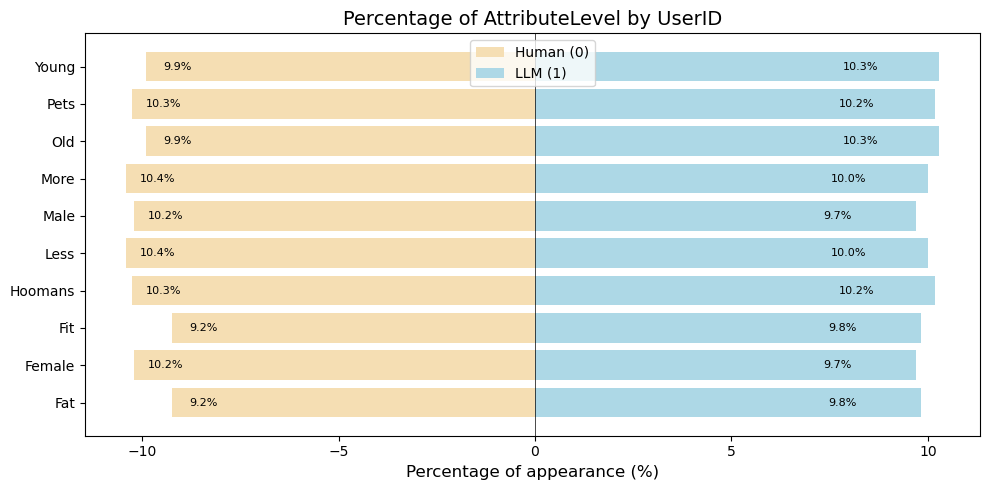

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by UserID and AttributeLevel, count occurrences
grouped_data = df_total_complete.groupby(['UserID', 'AttributeLevel']).size().unstack(fill_value=0)

# Normalize each row to get percentages within UserID group
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Extract percentages for UserID = 0 and UserID = 1 separately
percentage_0 = percentages.loc[0]
percentage_1 = percentages.loc[1]

# Plotting
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define the positions of the bars on the y-axis
y_pos = np.arange(len(percentage_0))

# Plot the negative percentages for UserID = 0 on the left side
bars_0 = ax.barh(y_pos, -percentage_0, align='center', color='wheat', label='Human (0)', height=0.8)

# Plot the positive percentages for UserID = 1 on the right side
bars_1 = ax.barh(y_pos, percentage_1, align='center', color='lightblue', label='LLM (1)', height=0.8)

# Add labels for ScenarioTypeStrict categories
ax.set_yticks(y_pos)
ax.set_yticklabels(percentage_0.index)

# Add labels and title
plt.title('Percentage of AttributeLevel by UserID', fontsize=14)
ax.set_xlabel('Percentage of appearance (%)', fontsize=12)

# Add a vertical line at 0 to separate the two sides
ax.axvline(0, color='black', linewidth=0.5)

# Add legend
plt.legend(loc='upper center')

# Add percentage labels inside the bars
# Adding labels for UserID = 0 (negative bars)
for bar in bars_0:
    width = bar.get_width()
    ax.text(width + 0.8, bar.get_y() + bar.get_height()/2, f'{-width:.1f}%', 
            ha='center', va='center', color='black', fontsize=8)

# Adding labels for UserID = 1 (positive bars)
for bar in bars_1:
    width = bar.get_width()
    ax.text(width - 2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
            ha='center', va='center', color='black', fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


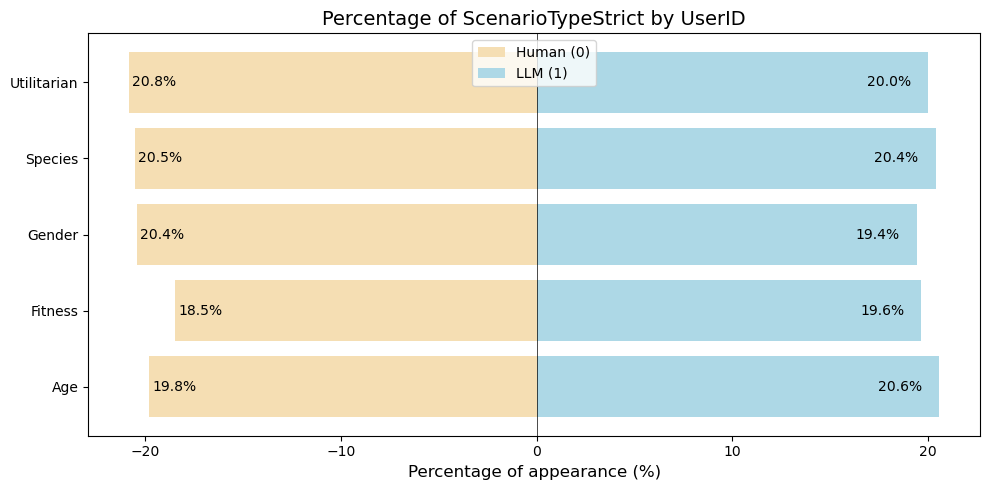

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by UserID and ScenarioTypeStrict, count occurrences
grouped_data = df_total_complete.groupby(['UserID', 'ScenarioTypeStrict']).size().unstack(fill_value=0)

# Normalize each row to get percentages within UserID group
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Extract percentages for UserID = 0 and UserID = 1 separately
percentage_0 = percentages.loc[0]
percentage_1 = percentages.loc[1]

# Plotting
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define the positions of the bars on the y-axis
y_pos = np.arange(len(percentage_0))

# Plot the negative percentages for UserID = 0 on the left side
bars_0 = ax.barh(y_pos, -percentage_0, align='center', color='wheat', label='Human (0)', height=0.8)

# Plot the positive percentages for UserID = 1 on the right side
bars_1 = ax.barh(y_pos, percentage_1, align='center', color='lightblue', label='LLM (1)', height=0.8)

# Add labels for ScenarioTypeStrict categories
ax.set_yticks(y_pos)
ax.set_yticklabels(percentage_0.index)

# Add labels and title
plt.title('Percentage of ScenarioTypeStrict by UserID', fontsize=14)
ax.set_xlabel('Percentage of appearance (%)', fontsize=12)

# Add a vertical line at 0 to separate the two sides
ax.axvline(0, color='black', linewidth=0.5)

# Add legend
plt.legend(loc='upper center')

# Add percentage labels inside the bars
# Adding labels for UserID = 0 (negative bars)
for bar in bars_0:
    width = bar.get_width()
    ax.text(width + 1.3, bar.get_y() + bar.get_height()/2, f'{-width:.1f}%', 
            ha='center', va='center', color='black', fontsize=10)

# Adding labels for UserID = 1 (positive bars)
for bar in bars_1:
    width = bar.get_width()
    ax.text(width - 2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
            ha='center', va='center', color='black', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [100]:
# saving the dataset

df_total_complete.to_csv('deleted_dataset.csv', index=False)